<a href="https://colab.research.google.com/github/pharringtonp19/DMLonGitHub/blob/master/Dithering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### For a convex loss function, dithering hurts

- The same mean squared error in the first stage can have different mean square errors in the second stage

In [5]:
from jax import random, vmap
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
n = 1000
keys = vmap(random.PRNGKey)(jnp.arange(n))
first_stage = vmap(random.normal)(keys)

keys = vmap(random.PRNGKey)(jnp.arange(n))
second_stage_noise = vmap(random.normal)(keys) 
second_stage = second_stage_noise + first_stage

second_stage_alt = jnp.sqrt(jnp.mean(first_stage**2)) + second_stage_noise


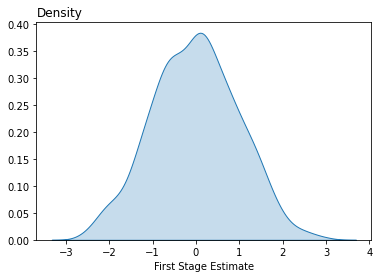

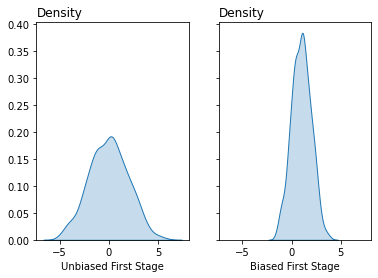

In [28]:
sns.kdeplot(first_stage, fill=True)
plt.ylabel("")
plt.title("Density", loc="left")
plt.xlabel("First Stage Estimate")
plt.show()

fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
sns.kdeplot(second_stage, fill=True, ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_title("Density", loc="left")
axs[0].set_xlabel("Unbiased First Stage")

sns.kdeplot(second_stage_alt, fill=True, ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_title("Density", loc="left")
axs[1].set_xlabel("Biased First Stage")
plt.show()